# Does the experimental web page drive higher traffic than the control web page ?
More Click-Through-Rate in the new website ? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [13]:
# total number of actions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
timestamp    8188 non-null object
id           8188 non-null int64
group        8188 non-null object
action       8188 non-null object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [3]:
# number of unique users
df['id'].nunique()

6328

In [12]:
# size of control group and experiment group
df.query('group == "control"').id.nunique(), df.query('group == "experiment"').id.nunique() 

(3332, 2996)

In [9]:
# duration of this experiment
df.timestamp.min(), df.timestamp.max()

('2016-09-24 17:42:27.839496', '2017-01-18 10:24:08.629327')

In [10]:
# action types in this experiment
df.action.unique()

array(['view', 'click'], dtype=object)

### Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

because... Getting the proportion of the users who click is more effective than getting the number of users who click when comparing groups of different sizes.ie..more total clicks could occur in one version, even if there is a greater percentage of clicks in the other version (simpson's paradox)

### Definition of click through rate (CTR) for this experiment

The No.of unique visitors who click at least once / The No.of unique visitors who view the page

### Use $CTR_{old}$ and $CTR_{new}$ in our hypotheses.

$$H_0: CTR_{new} - CTR_{old} \leq 0$$  
$$H_1: CTR_{new} - CTR_{old} > 0$$

# Steps to analyze the results of this A/B test.

`1.` We computed the observed difference between the `metric`, **click through rate**, for the control and experiment group.

`2.` We simulated the sampling distribution for the difference in proportions (or difference in click through rates).

`3.` We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.

`4.` We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.

`5.` We used this p-value to determine the statistical significance of our observed difference.

In [14]:
# Extract all the actions from control group
control_df = df.query('group == "control"')

# compute click through rate
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique(); 
control_ctr

0.2797118847539016

In [15]:
# Extract all actions from experiment group
experiment_df = df.query('group == "experiment"')

# compute click through rate
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique();
experiment_ctr 

0.3097463284379172

In [16]:
# compute observed difference in CTR
obs_diff = experiment_ctr - control_ctr; obs_diff

0.030034443684015644

In [17]:
# See if this difference is significant !

#BOOTSTRAPPING ! to simulate the sampling distribution for the difference in proportions - CTRs !

diffs = []

for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

In [22]:
# Compute the C.I. ?????? we need t-statistics??? WTF? 
#upper = np.percentile(diffs, 95)
#lower = np.percentile(diffs, 5)

(array([   13.,   102.,   520.,  1535.,  2768.,  2858.,  1608.,   504.,
           87.,     5.]),
 array([-0.01611488, -0.00691579,  0.00228329,  0.01148237,  0.02068145,
         0.02988054,  0.03907962,  0.0482787 ,  0.05747778,  0.06667687,
         0.07587595]),
 <a list of 10 Patch objects>)

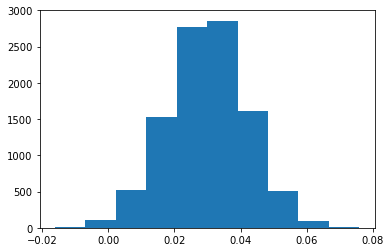

In [24]:
# convert to numpy ?????
diffs = np.array(diffs)
                 
# plot sampling distribution
plt.hist(diffs)
#plt.axvline(x=upper, color='r', linewidth=2)
#plt.axvline(x=lower, color='r', linewidth=2)


# Simulating From the Null Hypothesis
### $$H_0: CTR_{new} - CTR_{old} \leq 0$$  
#### : Simulating what we believe to be a possible under the H0, then seeing if our data in reality is consistent with that.

In [25]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

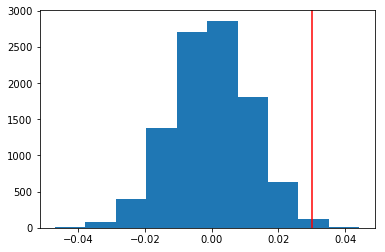

In [26]:
# plot null distribution and line at our observed differece
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

In [27]:
# compute p-value for (H0: diff = 0)..and.. >, <... follows H1? 
(null_vals > obs_diff).mean()

# So reject H0...

0.0044000000000000003